In [251]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

In [252]:
data = pd.read_csv("jobs_buildings_clean_v1.0.csv")
data = data.drop(["Unnamed: 0"],axis=1)

/Users/penelopelafeuille/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning and vizualizing the dataset

## First cleaning

In [253]:
# Removing the rows for which we don't know the initial cost
data = data[data['Initial Cost']!="$0.00"]

In [254]:
# Converting prices to floats
data["Initial Cost"] = data["Initial Cost"].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)
data["Total Est. Fee"] = data["Total Est. Fee"].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)

In [255]:
# Horizontal Enlrgmt to dummy variables
l = list(data["Horizontal Enlrgmt"])
for i in range(len(l)):
    if l[i]=='Y':
        l[i]=1
    elif l[i]=='N':
        l[i]=0
    elif l[i]=='0':
        l[i]=0
data["Horizontal Enlrgmt"] = pd.Series(l)

In [256]:
# Vertical Enlrgmt to dummy variables
l = list(data["Vertical Enlrgmt"])
for i in range(len(l)):
    if l[i]=='Y':
        l[i]=1
    elif l[i]=='N':
        l[i]=0
    elif l[i]=='0':
        l[i]=0
data["Vertical Enlrgmt"] = pd.Series(l)

In [257]:
# Dates to datetime format
dates_columns = ["Paid", "Fully Paid","Pre- Filing Date"]
for c in dates_columns : 
    data[c] = pd.to_datetime(data[c])
data['DOBRunDate']=pd.to_datetime(data['DOBRunDate'])
data['DOBRunDate']=pd.to_datetime(data['DOBRunDate'])
data['Latest Action Date']=pd.to_datetime(data['Latest Action Date'])

In [8]:
data.describe()

,landuse,bldgarea,numfloors,unitsres,unitstotal,bldgfront,bldgdepth,lottype,assesstot,yearbuilt,...,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,Special District
count,933060.000000,9.330600e+05,933060.000000,933060.000000,933060.000000,933060.000000,933060.000000,933060.000000,9.330600e+05,933060.000000,...,9.330600e+05,9.330600e+05,933060.000000,933060.000000,933060.000000,933060.000000,933060.000000,933060.000000,9.330600e+05,933060.000000
mean,3.985283,2.665625e+05,10.642951,61.485990,76.908068,90.917988,114.572940,3.934235,4.191862e+07,1910.012604,...,1.930163e+06,4.099533e+03,0.016241,0.015579,40.730767,-73.949693,17.512073,258.674624,2.229114e+06,0.196082
std,2.027259,7.324610e+05,13.705367,469.277056,473.630547,140.422218,158.283553,1.325714,1.292982e+08,231.242188,...,8.726560e+05,1.507414e+06,0.142293,0.500052,0.062256,0.068924,15.884443,293.780985,1.330916e+06,0.397031
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,8.468700e+04,0.000000e+00,0.000000,0.000000,40.507610,-74.254640,1.000000,1.000000,1.000000e+06,0.000000
25%,2.000000,3.929000e+03,2.000000,0.000000,2.000000,21.330000,50.000000,3.000000,3.163500e+05,1914.000000,...,1.262080e+06,0.000000e+00,0.000000,0.000000,40.694020,-73.989490,4.000000,79.000000,1.033126e+06,0.000000
50%,4.000000,2.654000e+04,5.000000,1.000000,6.000000,50.000000,85.000000,5.000000,2.565450e+06,1930.000000,...,2.056609e+06,0.000000e+00,0.000000,0.000000,40.741220,-73.972590,9.000000,137.000000,1.087978e+06,0.000000
75%,5.000000,2.037060e+05,13.000000,11.000000,43.000000,122.000000,129.000000,5.000000,2.453625e+07,1960.000000,...,2.665479e+06,0.000000e+00,0.000000,0.000000,40.762560,-73.923390,33.000000,317.000000,3.224668e+06,0.000000
max,11.000000,6.679310e+07,104.000000,9669.000000,9669.000000,8050.000000,9388.000000,9.000000,7.240287e+09,2020.000000,...,3.267246e+06,1.000000e+09,28.000000,44.000000,40.913710,-73.710550,51.000000,1621.000000,5.171941e+06,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933060 entries, 0 to 1212936
Data columns (total 80 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   address                        933060 non-null  object        
 1   bldgclass                      933060 non-null  object        
 2   landuse                        933060 non-null  float64       
 3   bldgarea                       933060 non-null  float64       
 4   numfloors                      933060 non-null  float64       
 5   unitsres                       933060 non-null  float64       
 6   unitstotal                     933060 non-null  float64       
 7   bldgfront                      933060 non-null  float64       
 8   bldgdepth                      933060 non-null  float64       
 9   lottype                        933060 non-null  float64       
 10  assesstot                      933060 non-null  float64       
 11 

## Several plots to have an overview of the data

### Number of queries per pre-filing date

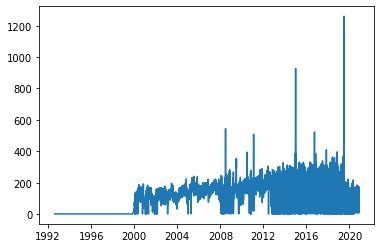

In [11]:
plt.plot(data.groupby("Pre- Filing Date").size())

### For which job types do we have a relevant amount of data? What is the average cost for each job type?

In [12]:
data.groupby("Job Type").size()

Job Type
A1     83633
A2    790833
A3     58572
DM         5
NB         7
SC         2
SG         7
SI         1
dtype: int64

It might me relevant to consider only A1, A2 and A3 because we don't have a relevant amount of data for the other types of job.

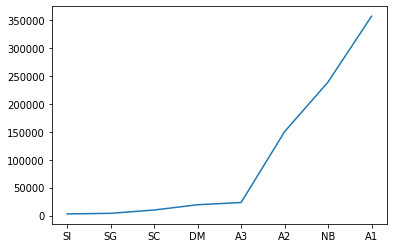

In [13]:
cost_job = data[['Initial Cost','Job Type']].groupby("Job Type").mean().sort_values(by='Initial Cost', ascending=True)
plt.plot(cost_job)

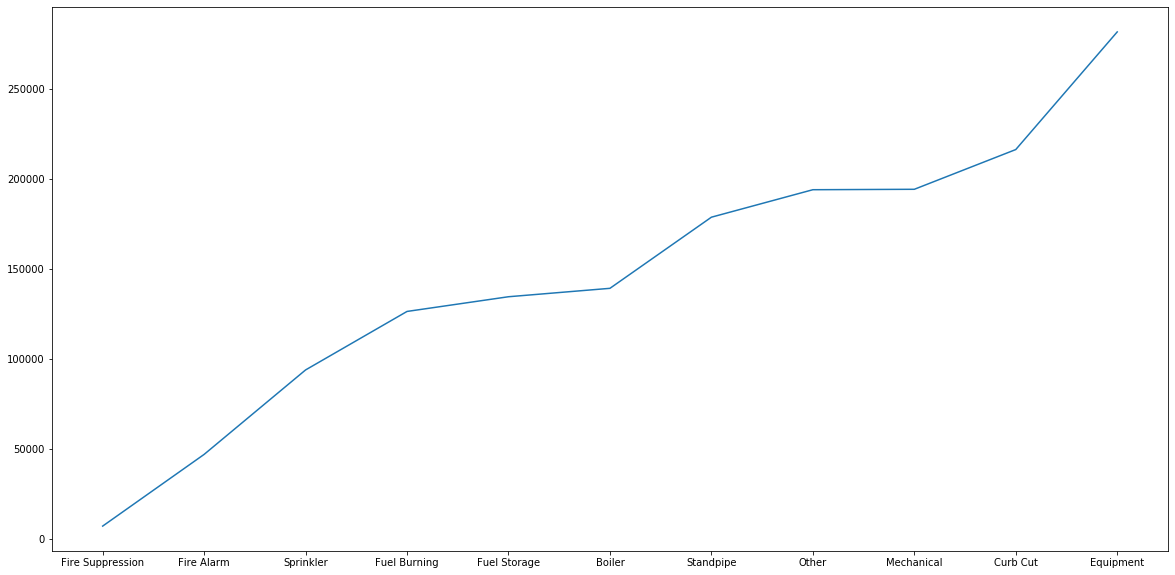

In [14]:
dico_cost = {}
jobs = ["Mechanical","Boiler","Fuel Burning","Fuel Storage","Standpipe","Sprinkler","Fire Alarm","Equipment","Fire Suppression","Curb Cut","Other"]
for job in jobs:
    cost_job = data[['Initial Cost',job]].groupby(job).mean()
    cost_job[job] = cost_job.index
    dico_cost[job]= [cost_job[cost_job[job]==1].loc[1,"Initial Cost"]]

mean_cost = pd.DataFrame.from_dict(dico_cost,orient='index')
plt.figure(figsize = (20,10))
plt.plot(mean_cost.sort_values(by=0, ascending=True))

In [15]:
dico_size = {}
jobs = ["Mechanical","Boiler","Fuel Burning","Fuel Storage","Standpipe","Sprinkler","Fire Alarm","Equipment","Fire Suppression","Curb Cut","Other"]
for job in jobs:
    dico_size[job]= data[data[job]==1].size

job_size = pd.DataFrame.from_dict(dico_size,orient='index')
job_size

,0
Mechanical,13528080
Boiler,2058240
Fuel Burning,593040
Fuel Storage,646240
Standpipe,608320
Sprinkler,6119760
Fire Alarm,5217840
Equipment,3600960
Fire Suppression,2642800
Curb Cut,340880


It seems like we have a relevant amount of data for each kind of job.

### For which building class do we have a relevant amount of data? What is the average cost for each building class?

In [16]:
bldgclass_size = data[['bldgclass']].groupby("bldgclass").size()
bldgclass_size.describe()

count      205.000000
mean      4551.512195
std      10709.038156
min          1.000000
25%        187.000000
50%        724.000000
75%       3594.000000
max      99051.000000
dtype: float64

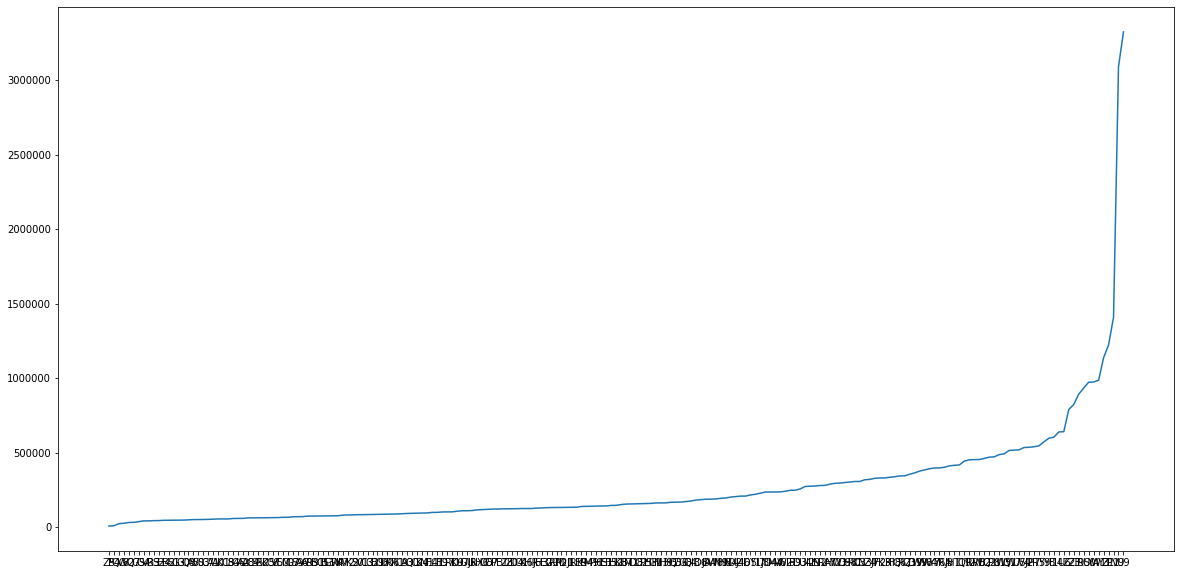

In [17]:
plt.figure(figsize = (20,10))
cost_bldgclass = data[['Initial Cost','bldgclass']].groupby("bldgclass").mean().sort_values(by='Initial Cost', ascending=True)
plt.plot(cost_bldgclass)

### For which borough do we have a relevant amount of data? What is the average cost for each borough?

In [18]:
borough_size = data[['Borough']].groupby("Borough").size()
borough_size

Borough
BRONX             55977
BROOKLYN         218230
MANHATTAN        474903
QUEENS           162513
STATEN ISLAND     21437
dtype: int64

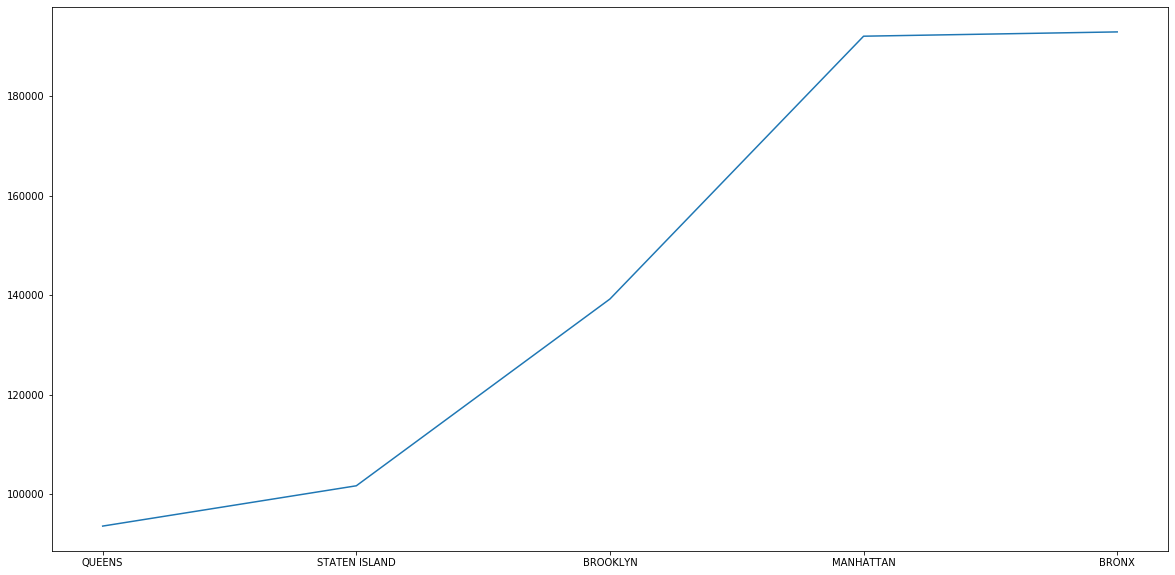

In [19]:
plt.figure(figsize = (20,10))
cost_Borough = data[['Initial Cost','Borough']].groupby("Borough").mean().sort_values(by='Initial Cost', ascending=True)
plt.plot(cost_Borough)

## Add dummy variables

In [258]:
# Get dummy variables for categorical features
to_dumm = ['bldgclass','Borough','Job Type','Job Status','Job Status Descrp','Building Type','Fee Status','Owner Type']
dum = pd.get_dummies(data[to_dumm],drop_first=True)
data[list(dum.columns)] = dum
data = data.drop(to_dumm,axis=1)

In [259]:
# Drop last features
data = data.drop(data.describe(include=['O']).columns,axis=1)

In [260]:
data = data.dropna()
data.describe()

,landuse,bldgarea,numfloors,unitsres,unitstotal,bldgfront,bldgdepth,lottype,assesstot,yearbuilt,...,Owner Type_HHC,Owner Type_HPD,Owner Type_INDIVIDUAL,Owner Type_NY STATE,Owner Type_NYC AGENCY,Owner Type_NYCHA,Owner Type_NYCHA/HHC,Owner Type_OTHER,Owner Type_OTHER GOV'T AGENCY,Owner Type_PARTNERSHIP
count,723419.000000,7.234190e+05,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,7.234190e+05,723419.000000,...,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000,723419.000000
mean,4.306830,3.395794e+05,12.722265,76.352469,95.915921,106.327415,129.172544,3.761170,5.367305e+07,1910.652090,...,0.000771,0.000553,0.234976,0.000458,0.004816,0.003326,0.005838,0.018462,0.020649,0.273732
std,1.917561,8.131101e+05,14.853101,531.759972,536.115541,153.005121,175.363889,1.361885,1.446896e+08,242.401491,...,0.027762,0.023508,0.423984,0.021386,0.069230,0.057574,0.076181,0.134616,0.142207,0.445873
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.250000e+03,3.000000,0.000000,2.000000,25.000000,55.400000,3.000000,7.474500e+05,1919.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,6.502800e+04,6.000000,0.000000,10.000000,75.000000,94.000000,4.000000,6.505650e+06,1931.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,3.301200e+05,17.000000,16.000000,57.000000,152.000000,160.000000,5.000000,4.196970e+07,1963.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.000000,2.205181e+07,104.000000,9669.000000,9669.000000,7538.000000,9388.000000,9.000000,7.240287e+09,2020.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Getting to know the data

### Look at which features are the most correlated to the cost

In [261]:
correlation = data.corr()["Initial Cost"]

In [262]:
correlation.describe()

count    316.000000
mean       0.007949
std        0.076968
min       -0.053918
25%       -0.001147
50%       -0.000068
75%        0.002775
max        1.000000
Name: Initial Cost, dtype: float64

In [263]:
len(correlation[abs(correlation)>0.01])

58

In [264]:
corr_cost = list(correlation[abs(correlation)>0.01].index)
corr_cost

['landuse',
 'bldgarea',
 'numfloors',
 'bldgfront',
 'bldgdepth',
 'lottype',
 'assesstot',
 'yearalter1',
 'yearalter2',
 'firm07_flag',
 'block',
 'ct2010',
 'Job #',
 'Block',
 'Bin #',
 'Community - Board',
 'City Owned',
 'Plumbing',
 'Sprinkler',
 'Fire Alarm',
 'Equipment',
 'Fire Suppression',
 'Other',
 'Initial Cost',
 'Total Est. Fee',
 'Existing Zoning Sqft',
 'Proposed Zoning Sqft',
 'Enlargement SQ Footage',
 'ExistingNo. of Stories',
 'Proposed No. of Stories',
 'Existing Height',
 'Proposed Height',
 'Zoning Dist2',
 'JOB_S1_NO',
 'GIS_COUNCIL_DISTRICT',
 'GIS_CENSUS_TRACT',
 'GIS_BIN',
 'Special District',
 'bldgclass_I1',
 'bldgclass_P1',
 'bldgclass_RB',
 'bldgclass_U9',
 'bldgclass_W1',
 'Borough_MANHATTAN',
 'Borough_QUEENS',
 'Job Type_A2',
 'Job Type_A3',
 'Job Status_F',
 'Building Type_OTHERS',
 'Fee Status_EXEMPT',
 'Fee Status_STANDARD',
 'Owner Type_HHC',
 'Owner Type_INDIVIDUAL',
 'Owner Type_NYC AGENCY',
 'Owner Type_NYCHA',
 'Owner Type_NYCHA/HHC',
 'Own

In [265]:
data_corr_cost = data[corr_cost]
data_corr_cost

,landuse,bldgarea,numfloors,bldgfront,bldgdepth,lottype,assesstot,yearalter1,yearalter2,firm07_flag,...,Building Type_OTHERS,Fee Status_EXEMPT,Fee Status_STANDARD,Owner Type_HHC,Owner Type_INDIVIDUAL,Owner Type_NYC AGENCY,Owner Type_NYCHA,Owner Type_NYCHA/HHC,Owner Type_OTHER,Owner Type_OTHER GOV'T AGENCY
0,5.0,542584.0,61.0,50.00,201.0,4.0,116000000.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,5.0,542584.0,61.0,50.00,201.0,4.0,116000000.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
2,5.0,542584.0,61.0,50.00,201.0,4.0,116000000.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
3,5.0,542584.0,61.0,50.00,201.0,4.0,116000000.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
4,5.0,542584.0,61.0,50.00,201.0,4.0,116000000.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933053,3.0,68456.0,8.0,100.92,96.0,3.0,5403150.0,1990.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
933055,3.0,68456.0,8.0,100.92,96.0,3.0,5403150.0,1990.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
933056,3.0,68456.0,8.0,100.92,96.0,3.0,5403150.0,1990.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
933057,1.0,1608.0,2.0,24.00,40.0,5.0,65280.0,2006.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0


# PCA and clustering

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723419 entries, 0 to 933058
Columns: 327 entries, landuse to Owner Type_PARTNERSHIP
dtypes: datetime64[ns](5), float64(23), int64(40), uint8(259)
memory usage: 579.5 MB


In [266]:
data_num = data.select_dtypes(include=['float64','int64','uint8']).drop(['yearalter1', 'yearalter2','Doc #','JOB_S1_NO','JOB_NO_GOOD_COUNT','Bin #'],axis=1)

In [267]:
list(data_num.columns)

['landuse',
 'bldgarea',
 'numfloors',
 'unitsres',
 'unitstotal',
 'bldgfront',
 'bldgdepth',
 'lottype',
 'assesstot',
 'yearbuilt',
 'firm07_flag',
 'lot',
 'block',
 'ct2010',
 'Job #',
 'Block',
 'Lot',
 'Community - Board',
 'Landmarked',
 'Adult Estab',
 'City Owned',
 'Little e',
 'Plumbing',
 'Mechanical',
 'Boiler',
 'Fuel Burning',
 'Fuel Storage',
 'Standpipe',
 'Sprinkler',
 'Fire Alarm',
 'Equipment',
 'Fire Suppression',
 'Curb Cut',
 'Other',
 'Initial Cost',
 'Total Est. Fee',
 'Existing Zoning Sqft',
 'Proposed Zoning Sqft',
 'Horizontal Enlrgmt',
 'Vertical Enlrgmt',
 'Enlargement SQ Footage',
 'Street Frontage',
 'ExistingNo. of Stories',
 'Proposed No. of Stories',
 'Existing Height',
 'Proposed Height',
 'Zoning Dist1',
 'Zoning Dist2',
 'Zoning Dist3',
 'TOTAL_CONSTRUCTION_FLOOR_AREA',
 'WITHDRAWAL_FLAG',
 'GIS_LATITUDE',
 'GIS_LONGITUDE',
 'GIS_COUNCIL_DISTRICT',
 'GIS_CENSUS_TRACT',
 'GIS_BIN',
 'Special District',
 'bldgclass_A1',
 'bldgclass_A2',
 'bldgclass_

In [268]:
data_clust=data_num[['landuse',
 'bldgarea',
 'numfloors',
 'unitsres',
 'unitstotal',
 'bldgfront',
 'bldgdepth',
 'lottype',
 'assesstot',
 'yearbuilt',
 'firm07_flag',
 'lot',
 'block',
 'ct2010',
 'Landmarked',
 'City Owned',
 'Little e',
 'Zoning Dist1',
 'Zoning Dist2',
 'Zoning Dist3',
 'Special District',
 'bldgclass_A1',
 'bldgclass_A2',
 'bldgclass_A3',
 'bldgclass_A4',
 'bldgclass_A5',
 'bldgclass_A6',
 'bldgclass_A7',
 'bldgclass_A8',
 'bldgclass_A9',
 'bldgclass_B1',
 'bldgclass_B2',
 'bldgclass_B3',
 'bldgclass_B9',
 'bldgclass_C0',
 'bldgclass_C1',
 'bldgclass_C2',
 'bldgclass_C3',
 'bldgclass_C4',
 'bldgclass_C5',
 'bldgclass_C6',
 'bldgclass_C7',
 'bldgclass_C8',
 'bldgclass_C9',
 'bldgclass_CM',
 'bldgclass_D0',
 'bldgclass_D1',
 'bldgclass_D2',
 'bldgclass_D3',
 'bldgclass_D4',
 'bldgclass_D5',
 'bldgclass_D6',
 'bldgclass_D7',
 'bldgclass_D8',
 'bldgclass_D9',
 'bldgclass_E1',
 'bldgclass_E2',
 'bldgclass_E7',
 'bldgclass_E9',
 'bldgclass_F1',
 'bldgclass_F2',
 'bldgclass_F4',
 'bldgclass_F5',
 'bldgclass_F8',
 'bldgclass_F9',
 'bldgclass_G0',
 'bldgclass_G1',
 'bldgclass_G2',
 'bldgclass_G3',
 'bldgclass_G4',
 'bldgclass_G5',
 'bldgclass_G6',
 'bldgclass_G7',
 'bldgclass_G8',
 'bldgclass_G9',
 'bldgclass_GU',
 'bldgclass_GW',
 'bldgclass_H1',
 'bldgclass_H2',
 'bldgclass_H3',
 'bldgclass_H4',
 'bldgclass_H5',
 'bldgclass_H6',
 'bldgclass_H8',
 'bldgclass_H9',
 'bldgclass_HB',
 'bldgclass_HH',
 'bldgclass_HR',
 'bldgclass_HS',
 'bldgclass_I1',
 'bldgclass_I2',
 'bldgclass_I3',
 'bldgclass_I4',
 'bldgclass_I5',
 'bldgclass_I6',
 'bldgclass_I7',
 'bldgclass_I9',
 'bldgclass_J1',
 'bldgclass_J2',
 'bldgclass_J3',
 'bldgclass_J4',
 'bldgclass_J5',
 'bldgclass_J6',
 'bldgclass_J7',
 'bldgclass_J8',
 'bldgclass_J9',
 'bldgclass_K1',
 'bldgclass_K2',
 'bldgclass_K3',
 'bldgclass_K4',
 'bldgclass_K5',
 'bldgclass_K6',
 'bldgclass_K7',
 'bldgclass_K8',
 'bldgclass_K9',
 'bldgclass_M1',
 'bldgclass_M2',
 'bldgclass_M3',
 'bldgclass_M4',
 'bldgclass_M9',
 'bldgclass_N1',
 'bldgclass_N2',
 'bldgclass_N3',
 'bldgclass_N4',
 'bldgclass_N9',
 'bldgclass_O1',
 'bldgclass_O2',
 'bldgclass_O3',
 'bldgclass_O4',
 'bldgclass_O5',
 'bldgclass_O6',
 'bldgclass_O7',
 'bldgclass_O8',
 'bldgclass_O9',
 'bldgclass_P1',
 'bldgclass_P2',
 'bldgclass_P3',
 'bldgclass_P4',
 'bldgclass_P5',
 'bldgclass_P6',
 'bldgclass_P7',
 'bldgclass_P8',
 'bldgclass_P9',
 'bldgclass_Q0',
 'bldgclass_Q1',
 'bldgclass_Q2',
 'bldgclass_Q3',
 'bldgclass_Q4',
 'bldgclass_Q5',
 'bldgclass_Q6',
 'bldgclass_Q7',
 'bldgclass_Q8',
 'bldgclass_Q9',
 'bldgclass_QG',
 'bldgclass_R1',
 'bldgclass_R2',
 'bldgclass_R3',
 'bldgclass_R4',
 'bldgclass_R5',
 'bldgclass_R6',
 'bldgclass_R9',
 'bldgclass_RA',
 'bldgclass_RB',
 'bldgclass_RC',
 'bldgclass_RD',
 'bldgclass_RH',
 'bldgclass_RI',
 'bldgclass_RK',
 'bldgclass_RM',
 'bldgclass_RR',
 'bldgclass_RS',
 'bldgclass_RW',
 'bldgclass_RX',
 'bldgclass_RZ',
 'bldgclass_S0',
 'bldgclass_S1',
 'bldgclass_S2',
 'bldgclass_S3',
 'bldgclass_S4',
 'bldgclass_S5',
 'bldgclass_S9',
 'bldgclass_T1',
 'bldgclass_T2',
 'bldgclass_T9',
 'bldgclass_U0',
 'bldgclass_U1',
 'bldgclass_U2',
 'bldgclass_U4',
 'bldgclass_U5',
 'bldgclass_U6',
 'bldgclass_U7',
 'bldgclass_U9',
 'bldgclass_V0',
 'bldgclass_V1',
 'bldgclass_V2',
 'bldgclass_V3',
 'bldgclass_V4',
 'bldgclass_V5',
 'bldgclass_V6',
 'bldgclass_V8',
 'bldgclass_V9',
 'bldgclass_W1',
 'bldgclass_W2',
 'bldgclass_W3',
 'bldgclass_W4',
 'bldgclass_W5',
 'bldgclass_W6',
 'bldgclass_W7',
 'bldgclass_W8',
 'bldgclass_W9',
 'bldgclass_Y1',
 'bldgclass_Y2',
 'bldgclass_Y3',
 'bldgclass_Y4',
 'bldgclass_Y6',
 'bldgclass_Y7',
 'bldgclass_Y8',
 'bldgclass_Y9',
 'bldgclass_Z0',
 'bldgclass_Z1',
 'bldgclass_Z2',
 'bldgclass_Z3',
 'bldgclass_Z4',
 'bldgclass_Z5',
 'bldgclass_Z8',
 'Borough_BROOKLYN',
 'Borough_MANHATTAN',
 'Borough_QUEENS',
 'Borough_STATEN ISLAND',
 'Owner Type_CORPORATION',
 'Owner Type_DCAS',
 'Owner Type_DOE',
 'Owner Type_HHC',
 'Owner Type_HPD',
 'Owner Type_INDIVIDUAL',
 'Owner Type_NY STATE',
 'Owner Type_NYC AGENCY',
 'Owner Type_NYCHA',
 'Owner Type_NYCHA/HHC',
 'Owner Type_OTHER',
 "Owner Type_OTHER GOV'T AGENCY",
 'Owner Type_PARTNERSHIP']]

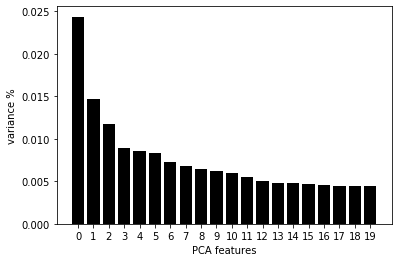

In [269]:
# Standardize the data to have a mean of ~0 and a variance of 1
data_std = StandardScaler().fit_transform(data_clust)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(data_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

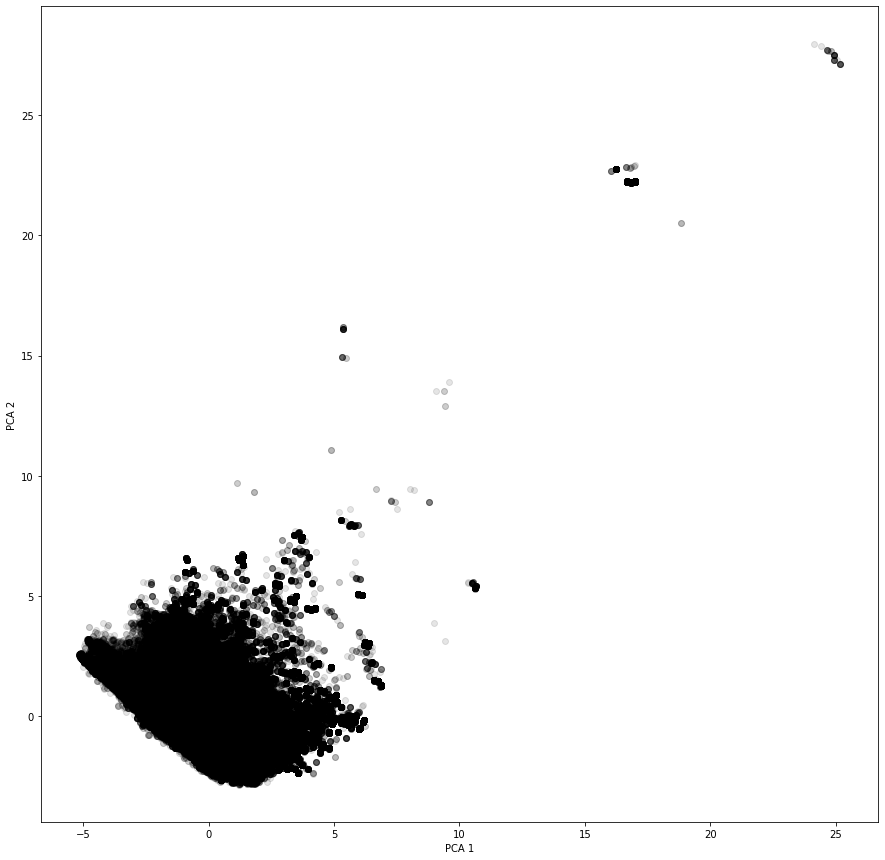

In [270]:
plt.figure(figsize = (15,15))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

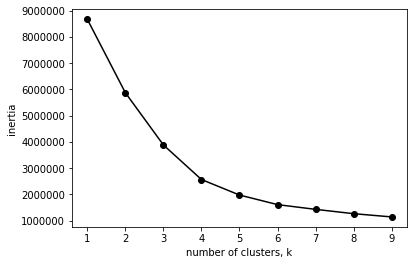

In [271]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

It looks like the value of 5 is interesting for the number of clusters.

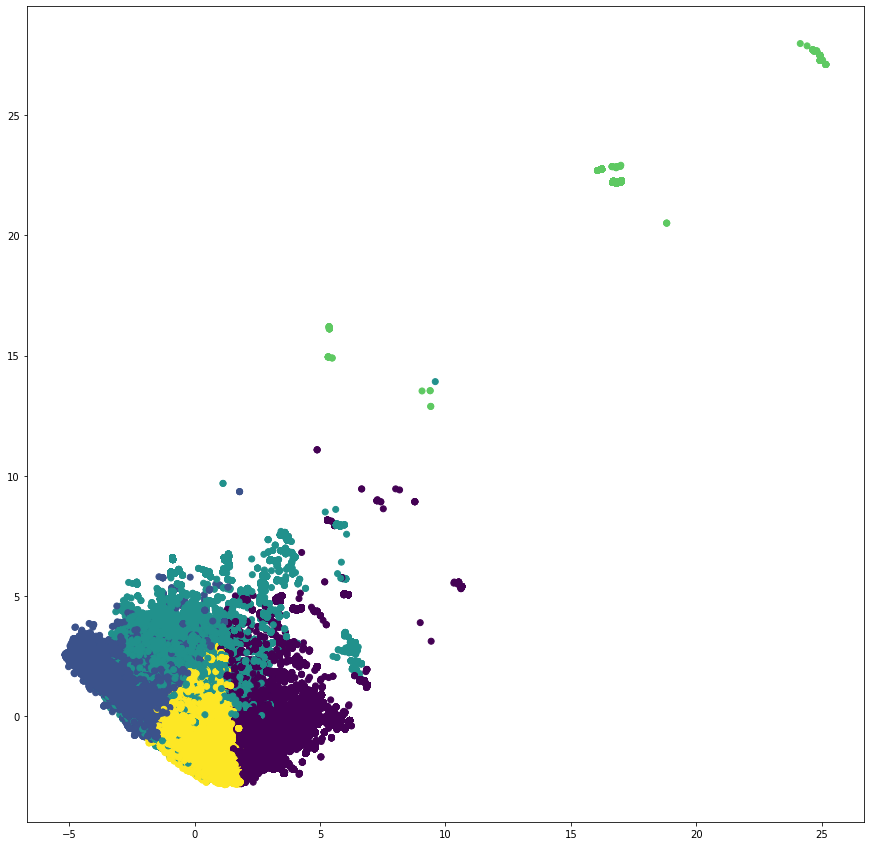

In [272]:
# Kmeans with 5 clusters
model = KMeans(n_clusters=5)
clusters = model.fit_predict(PCA_components.iloc[:,:3])
plt.figure(figsize = (15,15))
plt.scatter(PCA_components[0], PCA_components[1], c=clusters)

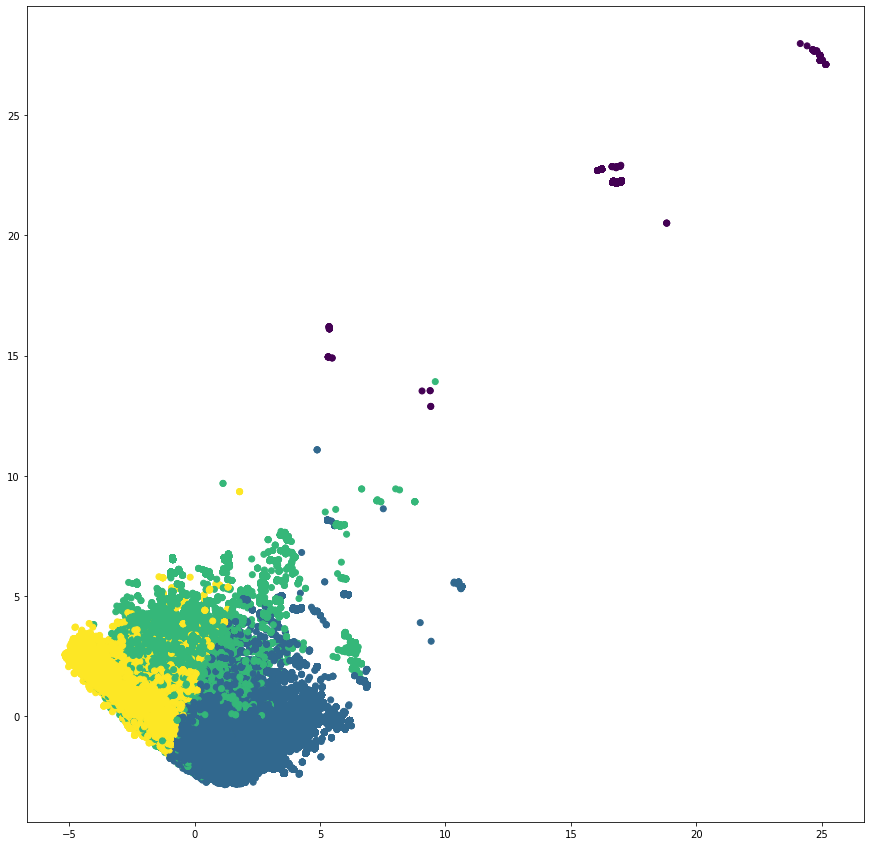

In [273]:
# Kmeans with 4 clusters
model = KMeans(n_clusters=4)
clusters = model.fit_predict(PCA_components.iloc[:,:3])
plt.figure(figsize = (15,15))
plt.scatter(PCA_components[0], PCA_components[1], c=clusters)

# Predict cost

In [274]:
data_num["Cluster"] = clusters

In [275]:
y = data_num['Initial Cost']

In [276]:
X = data_num.drop(['Initial Cost','Total Est. Fee'],axis=1)

In [277]:
list(X.columns)

['landuse',
 'bldgarea',
 'numfloors',
 'unitsres',
 'unitstotal',
 'bldgfront',
 'bldgdepth',
 'lottype',
 'assesstot',
 'yearbuilt',
 'firm07_flag',
 'lot',
 'block',
 'ct2010',
 'Job #',
 'Block',
 'Lot',
 'Community - Board',
 'Landmarked',
 'Adult Estab',
 'City Owned',
 'Little e',
 'Plumbing',
 'Mechanical',
 'Boiler',
 'Fuel Burning',
 'Fuel Storage',
 'Standpipe',
 'Sprinkler',
 'Fire Alarm',
 'Equipment',
 'Fire Suppression',
 'Curb Cut',
 'Other',
 'Existing Zoning Sqft',
 'Proposed Zoning Sqft',
 'Horizontal Enlrgmt',
 'Vertical Enlrgmt',
 'Enlargement SQ Footage',
 'Street Frontage',
 'ExistingNo. of Stories',
 'Proposed No. of Stories',
 'Existing Height',
 'Proposed Height',
 'Zoning Dist1',
 'Zoning Dist2',
 'Zoning Dist3',
 'TOTAL_CONSTRUCTION_FLOOR_AREA',
 'WITHDRAWAL_FLAG',
 'GIS_LATITUDE',
 'GIS_LONGITUDE',
 'GIS_COUNCIL_DISTRICT',
 'GIS_CENSUS_TRACT',
 'GIS_BIN',
 'Special District',
 'bldgclass_A1',
 'bldgclass_A2',
 'bldgclass_A3',
 'bldgclass_A4',
 'bldgclass_A5

In [245]:
X = X[[
 'Plumbing',
 'Mechanical',
 'Boiler',
 'Fuel Burning',
 'Fuel Storage',
 'Standpipe',
 'Sprinkler',
 'Fire Alarm',
 'Equipment',
 'Fire Suppression',
 'Curb Cut',
 'Other',
 'Existing Zoning Sqft',
 'Proposed Zoning Sqft',
 'Horizontal Enlrgmt',
 'Vertical Enlrgmt',
 'Enlargement SQ Footage',
 'Street Frontage',
 'ExistingNo. of Stories',
 'Proposed No. of Stories',
 'Existing Height',
 'Proposed Height'
 'TOTAL_CONSTRUCTION_FLOOR_AREA',
 'WITHDRAWAL_FLAG',
 
 'Job Type_A2',
 'Job Type_A3',
 'Job Type_DM',
 'Job Type_NB',
 'Job Type_SC',
 'Job Type_SG',
 'Job Type_SI',
 'Job Status_A',
 'Job Status_B',
 'Job Status_C',
 'Job Status_D',
 'Job Status_E',
 'Job Status_F',
 'Job Status_H',
 'Job Status_J',
 'Job Status_K',
 'Job Status_P',
 'Job Status_Q',
 'Job Status_R',
 'Job Status_U',
 'Job Status_X',
 'Job Status Descrp_APPLICATION PROCESSED - ENTIRE',
 'Job Status Descrp_APPLICATION PROCESSED - NO PLAN EXAM',
 'Job Status Descrp_APPLICATION PROCESSED - PAYMENT ONLY',
 'Job Status Descrp_APPLICATION PROCESSED-PART-NO PAYMENT',
 'Job Status Descrp_COMPLETED',
 'Job Status Descrp_PERMIT ISSUED - ENTIRE JOB/WORK',
 'Job Status Descrp_PERMIT ISSUED - PARTIAL JOB',
 'Job Status Descrp_PLAN EXAM - APPROVED',
 'Job Status Descrp_PLAN EXAM - DISAPPROVED',
 'Job Status Descrp_PLAN EXAM - IN PROCESS',
 'Job Status Descrp_PLAN EXAM - PARTIAL APPROVAL',
 'Job Status Descrp_PRE-FILING',
 'Job Status Descrp_SIGNED OFF',
 'Job Status Descrp_SUSPENDED',
 'Building Type_OTHERS',
 'Fee Status_EXEMPT',
 'Fee Status_STANDARD',
 'Owner Type_CORPORATION',
 'Owner Type_DCAS',
 'Owner Type_DOE',
 'Owner Type_HHC',
 'Owner Type_HPD',
 'Owner Type_INDIVIDUAL',
 'Owner Type_NY STATE',
 'Owner Type_NYC AGENCY',
 'Owner Type_NYCHA',
 'Owner Type_NYCHA/HHC',
 'Owner Type_OTHER',
 "Owner Type_OTHER GOV'T AGENCY",
 'Owner Type_PARTNERSHIP',
 'Cluster']]

In [293]:
X = X[[
 'yearbuilt',
 'firm07_flag',
 'lot',
 'block',
 'City Owned',
 'Plumbing',
 'Mechanical',
 'Boiler',
 'Fuel Burning',
 'Fuel Storage',
 'Standpipe',
 'Sprinkler',
 'Fire Alarm',
 'Equipment',
 'Fire Suppression',
 'Curb Cut',
 'Other',
 'Job Type_A2',
 'Job Type_A3',
 'Job Type_DM',
 'Job Type_NB',
 'Job Type_SC',
 'Job Type_SG',
 'Job Type_SI',
 'Cluster']]

In [307]:
X0 = X[X['Cluster']==0]
X1 = X[X['Cluster']==1]
X2 = X[X['Cluster']==2]
X3 = X[X['Cluster']==3]

In [308]:
y0 = y[X['Cluster']==0]
y1 = y[X['Cluster']==1]
y2 = y[X['Cluster']==2]
y3 = y[X['Cluster']==3]

In [309]:
y2=y2[X2['Job Type_A2']==1]
X2=X2[X2['Job Type_A2']==1].drop(['Job Type_A2',
 'Job Type_A3',
 'Job Type_DM',
 'Job Type_NB',
 'Job Type_SC',
 'Job Type_SG',
 'Job Type_SI'],axis=1)

In [310]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.05, random_state=1)

In [311]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X1_train, y1_train)
y_pred = linreg.predict(X1_test)
acc_lin = round(mean_squared_error(y_pred, y1_test), 2)
np.sqrt(acc_lin)

1095093.714844976

In [312]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X2_train, y2_train)
y_pred = decision_tree.predict(X2_test)
acc_decision_tree = round(mean_squared_error(y_pred, y2_test), 2)
np.sqrt(acc_decision_tree)

4535952.855804729

In [119]:
data_num['Initial Cost'].mean()

183095.08332066203

In [300]:
abs(y_pred-y0_test).mean()

86959.38096645082

In [301]:
y0.mean()

88729.66983471074

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X0_train, y0_train)  # Fit the training data to the visualizer
visualizer.score(X0_test, y0_test)  # Evaluate the model on the test data
visualizer.show()  

ModuleNotFoundError: No module named 'yellowbrick'

In [160]:
list(X.columns)

['landuse',
 'bldgarea',
 'numfloors',
 'unitsres',
 'unitstotal',
 'bldgfront',
 'bldgdepth',
 'lottype',
 'assesstot',
 'yearbuilt',
 'firm07_flag',
 'lot',
 'block',
 'ct2010',
 'Job #',
 'Block',
 'Lot',
 'Community - Board',
 'Landmarked',
 'Adult Estab',
 'City Owned',
 'Little e',
 'Plumbing',
 'Mechanical',
 'Boiler',
 'Fuel Burning',
 'Fuel Storage',
 'Standpipe',
 'Sprinkler',
 'Fire Alarm',
 'Equipment',
 'Fire Suppression',
 'Curb Cut',
 'Other',
 'Existing Zoning Sqft',
 'Proposed Zoning Sqft',
 'Horizontal Enlrgmt',
 'Vertical Enlrgmt',
 'Enlargement SQ Footage',
 'Street Frontage',
 'ExistingNo. of Stories',
 'Proposed No. of Stories',
 'Existing Height',
 'Proposed Height',
 'Zoning Dist1',
 'Zoning Dist2',
 'Zoning Dist3',
 'TOTAL_CONSTRUCTION_FLOOR_AREA',
 'WITHDRAWAL_FLAG',
 'GIS_LATITUDE',
 'GIS_LONGITUDE',
 'GIS_COUNCIL_DISTRICT',
 'GIS_CENSUS_TRACT',
 'GIS_BIN',
 'Special District',
 'bldgclass_A1',
 'bldgclass_A2',
 'bldgclass_A3',
 'bldgclass_A4',
 'bldgclass_A5